In [1]:
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.datasets as datasets 
import torchvision.transforms as transforms
import numpy as np



device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [ ]:
## 1-1: Simulate a function

In [2]:
class Net(torch.nn.Module):
    def __init__(self, path):
        super(Net, self).__init__()

        self.hiddens = []
        for i in range(1, len(path)-1):
            h = torch.nn.Linear(path[i-1], path[i])
            self.hiddens.append(h)

            # Net.parameters only gets member variables,
            # so I have to define these manually as I go with exec (even if they're not used otherwise)
            exec(f'self.hidden{i} = h')

        self.output = torch.nn.Linear(path[len(path)-2], path[len(path)-1])

    def forward(self, x):

        for h in self.hiddens:
            x = torch.relu(h(x))

        x = self.output(x)
        return x

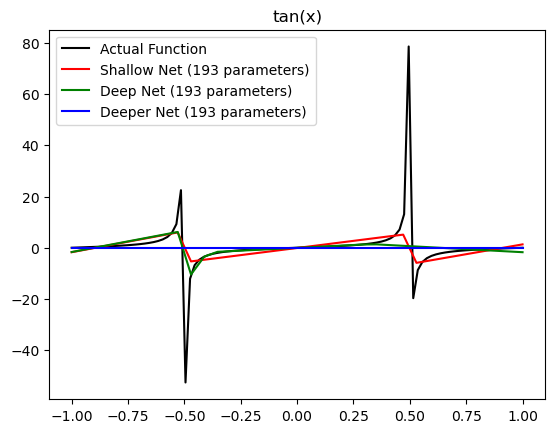

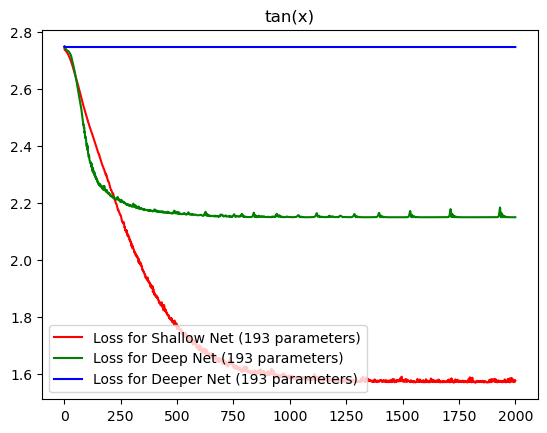

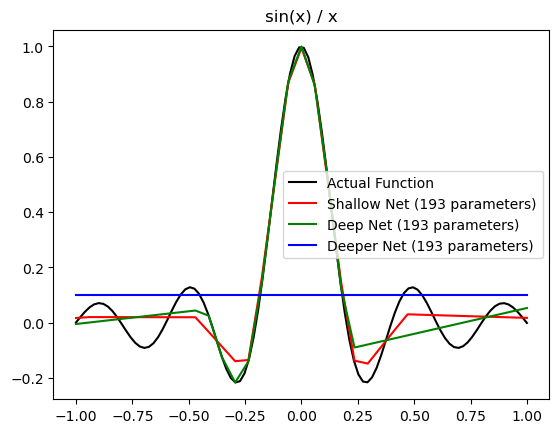

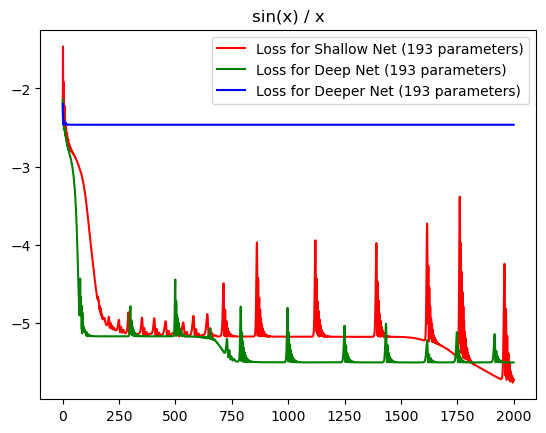

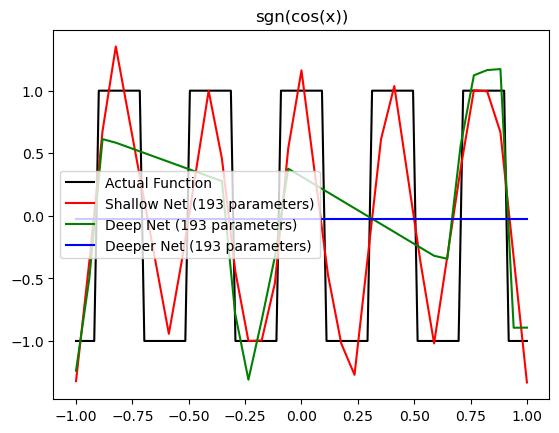

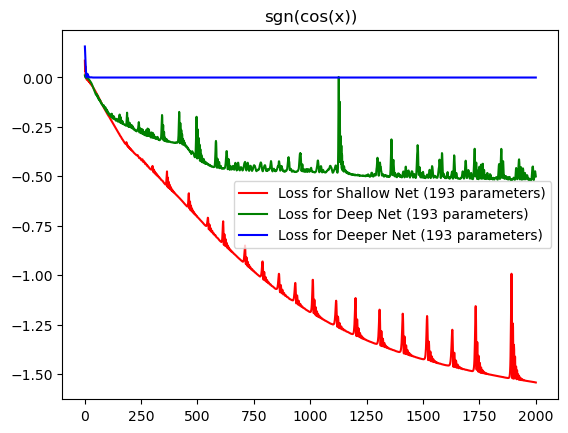

In [2]:
VERBOSE = False

if __name__ == '__main__':

    PI = 3.141592654

    def f1(x):
        return {"name": "sin(x) / x", "val": torch.sin(5*PI*(x+0.001))/(5*PI*(x+0.001))}

    def f2(x):
        return {"name": "sgn(cos(x))", "val": torch.sgn(torch.cos(5*PI*(x+0.001)))}
    
    def f3(x):
        return {"name": "tan(x)", "val": torch.tan(PI*(x+0.001))}

    x = torch.linspace(-1,1, 35)

    N = 2000
    r = 1
    
    BREADTHS = {"shallow":[1,64,1],"deep":[1,12,12,1],"deeper":[1,4,4,4,4,4,4,4,4,4,4,1]}
    PARAMS = {}
    MODELS = {}
    OPTIMS = {}

    # Options: LOSS, FUNCTION
    graphType = "LOSS"
        
    # Input = Net with variable size
    # Output = predicted function
    def run_on(f, fNet, fCrit, fOptim):

        losses = []
        running_loss = 0
        loss = 0

        for epoch in range(N):
            running_loss = 0.0
            fOptim.zero_grad()
            outputs = fNet(x.unsqueeze(1))
            loss = fCrit(outputs.squeeze(), f(x)["val"])
            loss.backward()
            fOptim.step()
            running_loss += loss.item()

            if epoch % r == 0:
                if VERBOSE: print("epoch = {} : loss = {} : running loss = {}".format(epoch, loss.detach().numpy(), running_loss))
                losses.append(torch.log(loss))

        if VERBOSE: print("epoch = {} (END) : loss = {} : running loss = {}".format(N, loss.detach().numpy(), running_loss))
        return {"LOSS": losses, "FUNCTION": fNet(x.unsqueeze(1)).squeeze()}

    criterion = torch.nn.MSELoss()
    
    for f in [f3, f1, f2]:
        
        for i,header in enumerate(["shallow", "deep", "deeper"]):
            this_net = Net(BREADTHS[header])
            this_optim = torch.optim.Adam(this_net.parameters(), lr = 0.025)
            this_params = sum(p.numel() for p in this_net.parameters())
            
            MODELS[header] = this_net
            OPTIMS[header] = this_optim
            PARAMS[header] = this_params

#         shallow_breadth = [1,64,1]
#         shallow_net = Net(shallow_breadth)
#         shallow_criterion = torch.nn.MSELoss()
#         shallow_optimizer = torch.optim.Adam(shallow_net.parameters(), lr = 0.025)
#         shallow_params = sum(p.numel() for p in shallow_net.parameters())

#         deep_breadth = [1,12,12,1]
#         deep_net = Net(deep_breadth)
#         deep_criterion = torch.nn.MSELoss()
#         deep_optimizer = torch.optim.Adam(deep_net.parameters(), lr = 0.025)
#         deep_params = sum(p.numel() for p in deep_net.parameters())

#         deeper_breadth = [1,4,4,4,4,4,4,4,4,4,4,1]
#         deeper_net = Net(deeper_breadth)
#         deeper_criterion = torch.nn.MSELoss()
#         deeper_optimizer = torch.optim.Adam(deeper_net.parameters(), lr = 0.025)
#         deeper_params = sum(p.numel() for p in deeper_net.parameters())

        x_plot = torch.linspace(-1,1, 100)
        actual_y = torch.tensor([f(p)["val"] for p in x_plot])

        c = ['r', 'g', 'b']
        RESULTS = {}

        for i,header in enumerate(["shallow", "deep", "deeper"]):
            run_result = None
            breadth = None
            params = None

            RESULTS[header] = run_on(f, MODELS[header], criterion, OPTIMS[header])

        for graphType in ["FUNCTION", "LOSS"]:

            hasGroundTruth = False

            for i,header in enumerate(["shallow", "deep", "deeper"]):

                run_result = RESULTS[header]
                breadth = BREADTHS[header]
                params = PARAMS[header]

                if not hasGroundTruth and graphType == "FUNCTION":
                    plt.plot(x_plot, actual_y, 'k', label='Actual Function')
                    hasGroundTruth = True
                    
                plt.title(f(torch.empty(1,64))["name"])
                    
                if graphType == "FUNCTION":
                    plt.plot(x, run_result['FUNCTION'].detach().numpy(), c[i%3], label=f'{header.capitalize()} Net ({params} parameters)')
                elif graphType == "LOSS":
                    # .format(r, str(shallow_breadth), shallow_params)
                    plt.plot(torch.linspace(1,N//r,N//r), torch.tensor(run_result['LOSS']), c[i%3], label = f'Loss for {header.capitalize()} Net ({params} parameters)')

            plt.legend()
            plt.show()

In [2]:
# 1-1 real example

Epoch 0: 0/6000
Epoch 0: 1000/6000
Epoch 0: 2000/6000
Epoch 0: 3000/6000
Epoch 0: 4000/6000
Epoch 0: 5000/6000
epoch = 0 : loss = 0.227251335978508 : running loss = 0.33222940871527085
Epoch 1: 0/6000
Epoch 1: 1000/6000
Epoch 1: 2000/6000
Epoch 1: 3000/6000
Epoch 1: 4000/6000
Epoch 1: 5000/6000
epoch = 1 : loss = 0.02511921152472496 : running loss = 0.17249147274999962
Epoch 2: 0/6000
Epoch 2: 1000/6000
Epoch 2: 2000/6000
Epoch 2: 3000/6000
Epoch 2: 4000/6000
Epoch 2: 5000/6000
epoch = 2 : loss = 0.02170877531170845 : running loss = 0.139161912087383
Epoch 3: 0/6000
Epoch 3: 1000/6000
Epoch 3: 2000/6000
Epoch 3: 3000/6000
Epoch 3: 4000/6000
Epoch 3: 5000/6000
epoch = 3 : loss = 0.0451853983104229 : running loss = 0.12043475669330272
Epoch 4: 0/6000
Epoch 4: 1000/6000
Epoch 4: 2000/6000
Epoch 4: 3000/6000
Epoch 4: 4000/6000
Epoch 4: 5000/6000
epoch = 4 : loss = 0.030142182484269142 : running loss = 0.11072651058107352
Epoch 5: 0/6000
Epoch 5: 1000/6000
Epoch 5: 2000/6000
Epoch 5: 3000/6

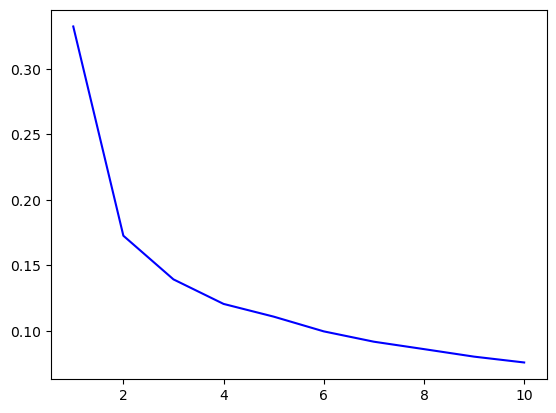

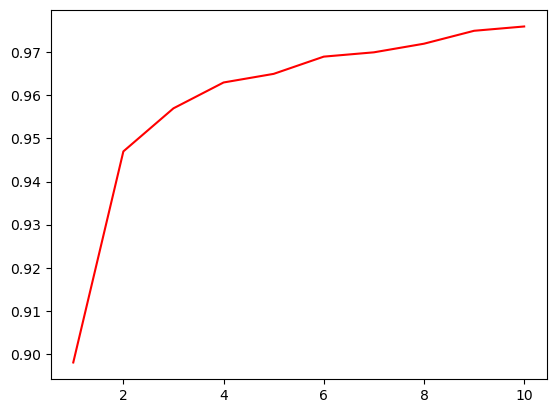

In [27]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=10, shuffle=True)

mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=10, shuffle=True)

class Net(torch.nn.Module):
    def __init__(self, path):
        super(Net, self).__init__()

        self.hiddens = []
        for i in range(1, len(path)-1):
            h = torch.nn.Linear(path[i-1], path[i])
            self.hiddens.append(h)

            # Net.parameters only gets member variables,
            # so I have to define these manually as I go with exec (even if they're not used otherwise)
            exec(f'self.hidden{i} = h')

        self.output = torch.nn.Linear(path[len(path)-2], path[len(path)-1])

    def forward(self, x):

        for h in self.hiddens:
            x = torch.relu(h(x))

        x = self.output(x)
        return x

net = Net([28*28, 100, 50, 10])

cross_el = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
epochs = 10

losses = []
running_loss = 0
loss = 0
correct = 0
total = 0

losses = []
accuracies = []

for epoch in range(epochs):
    net.train()
    
    running_loss = 0
    correct = 0
    total = 0

    for n,data in enumerate(train_loader):
        x, y = data
        optimizer.zero_grad()
        output = net(x.view(-1, 28*28))
        
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
            
        loss = cross_el(output, y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()/len(train_loader)
        if n%1000 == 0: print(f"Epoch {epoch}: {n}/{len(train_loader)}")
        
    print("epoch = {} : loss = {} : running loss = {}".format(epoch, loss.detach().numpy(), running_loss))
    accuracies.append(round(correct/total, 3))
    losses.append(running_loss)
    
correct = 0
total = 0
    
with torch.no_grad():
    for data in test_loader:
        x, y = data
        output = net(x.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct +=1
            total +=1
print(f'accuracy: {round(correct/total, 3)}')
                      
plt.plot(torch.linspace(1,10,10), torch.tensor(losses), 'b', label = f'Loss over 10 Epochs for MNIST')
plt.show()

plt.plot(torch.linspace(1,10,10), torch.tensor(accuracies), 'r', label = f'Accuracy over 10 Epochs for MNIST')
plt.show()


In [ ]:
# 1-2: Observe gradient norm during training

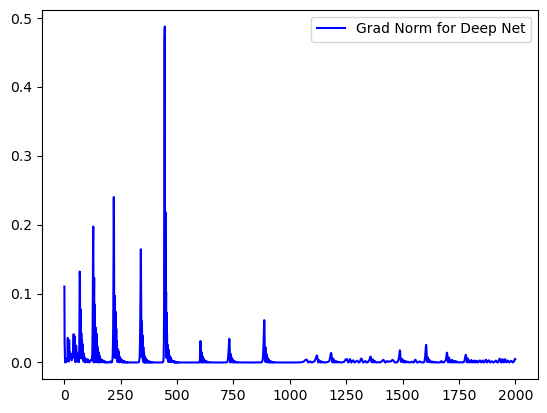

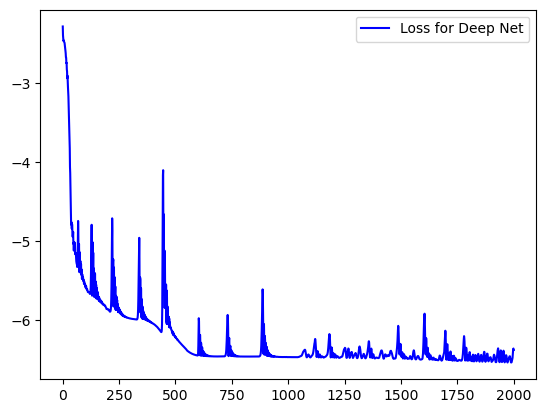

ValueError: s must be a scalar, or float array-like with the same size as x and y

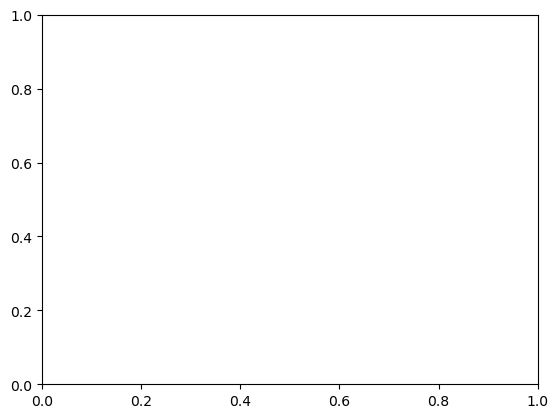

In [36]:
VERBOSE = False

if __name__ == '__main__':
    
    class Net(torch.nn.Module):
        def __init__(self):
            super(Net, self).__init__()

            self.hidden1 = torch.nn.Linear(1,24)
            self.hidden2 = torch.nn.Linear(24,24)
            self.hidden3 = torch.nn.Linear(24,24)
            self.output = torch.nn.Linear(24,1)

        def forward(self, x):

            x = torch.relu(self.hidden1(x))
            x = torch.relu(self.hidden2(x))
            x = torch.relu(self.hidden3(x))
            x = self.output(x)

            return x

    PI = 3.141592654

    def f(x):
        return {"name": "sin(x) / x", "val": torch.sin(5*PI*(x+0.001))/(5*PI*(x+0.001))}

    x = torch.linspace(-1,1, 35)
    N = 2000
    r = 1
    
    tests = ["deep"]
    
    BREADTHS = {"deep":[]}
    PARAMS = {}
    MODELS = {}
    OPTIMS = {}

    # Options: LOSS, FUNCTION
    graphType = "LOSS"
        
    # Input = Net with variable size
    # Output = predicted function
    def run_on(f, fNet, fCrit, fOptim):

        losses = []
        grad_norms = []
        running_loss = 0
        loss = 0

        for epoch in range(N):
            running_loss = 0.0
            fOptim.zero_grad()
            outputs = fNet(x.unsqueeze(1))
            loss = fCrit(outputs.squeeze(), f(x)["val"])
            loss.backward()
            fOptim.step()
            running_loss += loss.item()

            if epoch % r == 0:
                if VERBOSE: print("epoch = {} : loss = {} : running loss = {}".format(epoch, loss.detach().numpy(), running_loss))
                losses.append(torch.log(loss))
                
                grad_all = 0
                
                for p in fNet.parameters():
                    grad = 0.0
                    if p.grad is not None:
                        grad = (p.grad.cpu().data.numpy() ** 2).sum()
                    grad_all += grad
                
                grad_norms.append(grad_all)

        if VERBOSE: print("epoch = {} (END) : loss = {} : running loss = {}".format(N, loss.detach().numpy(), running_loss))
        return {"LOSS": losses, "FUNCTION": fNet(x.unsqueeze(1)).squeeze(), "GRAD": grad_norms}

    criterion = torch.nn.MSELoss()

    
    for i,header in enumerate(tests):
        this_net = Net()
        this_optim = torch.optim.Adam(this_net.parameters(), lr = 0.025)
        this_params = sum(p.numel() for p in this_net.parameters())

        MODELS[header] = this_net
        OPTIMS[header] = this_optim
        PARAMS[header] = this_params

    x_plot = torch.linspace(-1,1, 100)
    actual_y = torch.tensor([f(p)["val"] for p in x_plot])

    colors = ['r', 'g', 'b']
    
    X = torch.randn(100, 5)
    
    for i,header in enumerate(tests):

        this_result = run_on(f, MODELS[header], criterion, OPTIMS[header])
    
        plt.plot(torch.linspace(1,N//r,N//r), torch.tensor(this_result['GRAD']), 'b', label = f'Grad Norm for {header.capitalize()} Net')
        
        plt.legend()
        plt.show()
        
        plt.plot(torch.linspace(1,N//r,N//r), torch.tensor(this_result['LOSS']), 'b', label = f'Loss for {header.capitalize()} Net')
        
        plt.legend()
        plt.show()

In [ ]:
#3-1 Can network fit random labels?

Epoch 0: 0/6000
Epoch 0: 1000/6000
Epoch 0: 2000/6000
Epoch 0: 3000/6000
Epoch 0: 4000/6000
Epoch 0: 5000/6000
epoch = 0 : loss = 2.297905683517456 : running loss = 2.302772692402207
Epoch 1: 0/6000
Epoch 1: 1000/6000
Epoch 1: 2000/6000
Epoch 1: 3000/6000
Epoch 1: 4000/6000
Epoch 1: 5000/6000
epoch = 1 : loss = 2.2855002880096436 : running loss = 2.3015976190169565
Epoch 2: 0/6000
Epoch 2: 1000/6000
Epoch 2: 2000/6000
Epoch 2: 3000/6000
Epoch 2: 4000/6000
Epoch 2: 5000/6000
epoch = 2 : loss = 2.2751097679138184 : running loss = 2.3015370344320867
Epoch 3: 0/6000
Epoch 3: 1000/6000
Epoch 3: 2000/6000
Epoch 3: 3000/6000
Epoch 3: 4000/6000
Epoch 3: 5000/6000
epoch = 3 : loss = 2.3101484775543213 : running loss = 2.3015160471995677
Epoch 4: 0/6000
Epoch 4: 1000/6000
Epoch 4: 2000/6000
Epoch 4: 3000/6000
Epoch 4: 4000/6000
Epoch 4: 5000/6000
epoch = 4 : loss = 2.294698476791382 : running loss = 2.3014658584197405
Epoch 5: 0/6000
Epoch 5: 1000/6000
Epoch 5: 2000/6000
Epoch 5: 3000/6000
Epoch

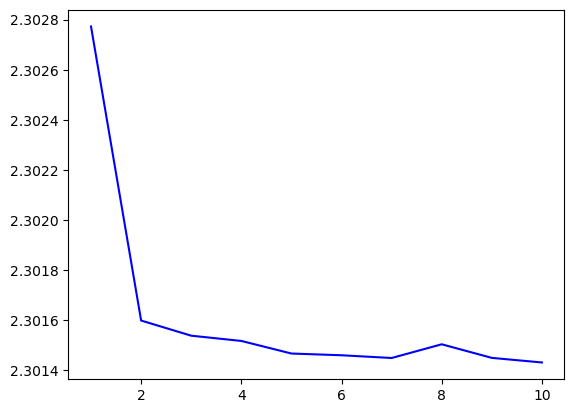

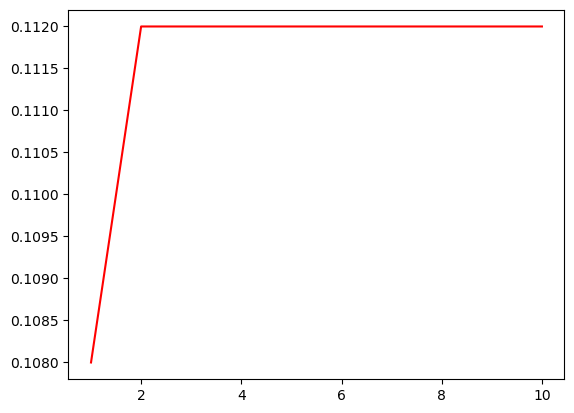

In [37]:
import random

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

targets_list = mnist_trainset.targets.tolist()
random.shuffle(targets_list)
mnist_trainset.targets = torch.tensor(targets_list)

train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=10, shuffle=True)

mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=10, shuffle=True)

class Net(torch.nn.Module):
    def __init__(self, path):
        super(Net, self).__init__()

        self.hiddens = []
        for i in range(1, len(path)-1):
            h = torch.nn.Linear(path[i-1], path[i])
            self.hiddens.append(h)

            # Net.parameters only gets member variables,
            # so I have to define these manually as I go with exec (even if they're not used otherwise)
            exec(f'self.hidden{i} = h')

        self.output = torch.nn.Linear(path[len(path)-2], path[len(path)-1])

    def forward(self, x):

        for h in self.hiddens:
            x = torch.relu(h(x))

        x = self.output(x)
        return x

net = Net([28*28, 100, 50, 10])

cross_el = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
epochs = 10

losses = []
running_loss = 0
loss = 0
correct = 0
total = 0

losses = []
accuracies = []

for epoch in range(epochs):
    net.train()
    
    running_loss = 0
    correct = 0
    total = 0

    for n,data in enumerate(train_loader):
        x, y = data
        optimizer.zero_grad()
        output = net(x.view(-1, 28*28))
        
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
            
        loss = cross_el(output, y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()/len(train_loader)
        if n%1000 == 0: print(f"Epoch {epoch}: {n}/{len(train_loader)}")
        
    print("epoch = {} : loss = {} : running loss = {}".format(epoch, loss.detach().numpy(), running_loss))
    accuracies.append(round(correct/total, 3))
    losses.append(running_loss)
    
correct = 0
total = 0
    
with torch.no_grad():
    for data in test_loader:
        x, y = data
        output = net(x.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct +=1
            total +=1
print(f'accuracy: {round(correct/total, 3)}')
                      
plt.plot(torch.linspace(1,10,10), torch.tensor(losses), 'b', label = f'Loss over 10 Epochs for MNIST')
plt.show()

plt.plot(torch.linspace(1,10,10), torch.tensor(accuracies), 'r', label = f'Accuracy over 10 Epochs for MNIST')
plt.show()

In [ ]:
#1-3 Number of parameters v.s. Generalization

s1
s2
s3
s4
s5
s6
s7
s8
s9
s10


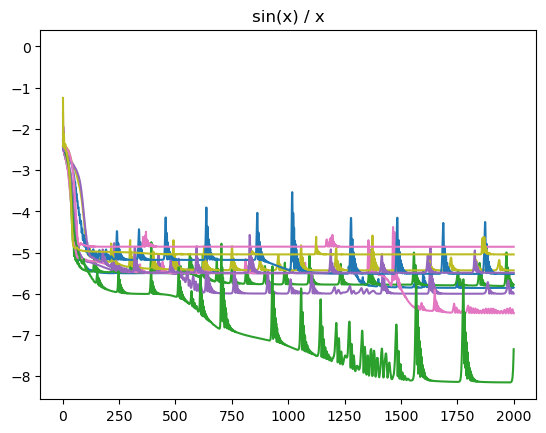

In [24]:
import random

VERBOSE = False

if __name__ == '__main__':

    PI = 3.141592654

    def f(x):
        return {"name": "sin(x) / x", "val": torch.sin(5*PI*(x+0.001))/(5*PI*(x+0.001))}

    x = torch.linspace(-1,1, 35)

    N = 2000
    r = 1
    
    tests = ["s1", "s2", "s3", "s4", "s5", "s6", "s7", "s8", "s9", "s10"]
    
    BREADTHS = {
        "s1": [1,12,12,1],
        "s2": [1,13,13,1],
        "s3": [1,14,14,1],
        "s4": [1,15,15,1],
        "s5": [1,16,16,1],
        "s6": [1,17,17,1],
        "s7": [1,18,18,1],
        "s8": [1,19,19,1],
        "s9": [1,20,20,1],
        "s10": [1,21,21,1],
    }
    PARAMS = {}
    MODELS = {}
    OPTIMS = {}

    # Options: LOSS, FUNCTION
    graphType = "LOSS"
        
    # Input = Net with variable size
    # Output = predicted function
    def run_on(f, fNet, fCrit, fOptim):

        losses = []
        running_loss = 0
        loss = 0

        for epoch in range(N):
            running_loss = 0.0
            fOptim.zero_grad()
            outputs = fNet(x.unsqueeze(1))
            loss = fCrit(outputs.squeeze(), f(x)["val"])
            loss.backward()
            fOptim.step()
            running_loss += loss.item()

            if epoch % r == 0:
                if VERBOSE: print("epoch = {} : loss = {} : running loss = {}".format(epoch, loss.detach().numpy(), running_loss))
                losses.append(torch.log(loss))

        if VERBOSE: print("epoch = {} (END) : loss = {} : running loss = {}".format(N, loss.detach().numpy(), running_loss))
        return {"LOSS": losses, "FUNCTION": fNet(x.unsqueeze(1)).squeeze()}

    criterion = torch.nn.MSELoss()
        
    for i,header in enumerate(tests):
        this_net = Net(BREADTHS[header])
        this_optim = torch.optim.Adam(this_net.parameters(), lr = 0.025)
        this_params = sum(p.numel() for p in this_net.parameters())

        MODELS[header] = this_net
        OPTIMS[header] = this_optim
        PARAMS[header] = this_params

#         shallow_breadth = [1,64,1]
#         shallow_net = Net(shallow_breadth)
#         shallow_criterion = torch.nn.MSELoss()
#         shallow_optimizer = torch.optim.Adam(shallow_net.parameters(), lr = 0.025)
#         shallow_params = sum(p.numel() for p in shallow_net.parameters())

#         deep_breadth = [1,12,12,1]
#         deep_net = Net(deep_breadth)
#         deep_criterion = torch.nn.MSELoss()
#         deep_optimizer = torch.optim.Adam(deep_net.parameters(), lr = 0.025)
#         deep_params = sum(p.numel() for p in deep_net.parameters())

#         deeper_breadth = [1,4,4,4,4,4,4,4,4,4,4,1]
#         deeper_net = Net(deeper_breadth)
#         deeper_criterion = torch.nn.MSELoss()
#         deeper_optimizer = torch.optim.Adam(deeper_net.parameters(), lr = 0.025)
#         deeper_params = sum(p.numel() for p in deeper_net.parameters())

    x_plot = torch.linspace(-1,1, 100)
    actual_y = torch.tensor([f(p)["val"] for p in x_plot])

    RESULTS = {}

    for i,header in enumerate(tests):
        print(header)
        run_result = None
        breadth = None
        params = None

        RESULTS[header] = run_on(f, MODELS[header], criterion, OPTIMS[header])

    graphType = "LOSS"
    
    for header in tests:

        run_result = RESULTS[header]
        breadth = BREADTHS[header]
        params = PARAMS[header]

        plt.title(f(torch.empty(1,64))["name"])

        # .format(r, str(shallow_breadth), shallow_params)
        plt.plot(torch.linspace(1,N//r,N//r), torch.tensor(run_result['LOSS']), 'k', label=f'({params})')

    plt.show()